In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv(r"C:\\Users\\TEJAL POWAR\\Desktop\\PY-ML\\Auto.csv")
df.head()

,Price,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Resale
0,21.50,1.8,140,101.2,67.3,172.4,2.639,13.2,28,16.360
1,28.40,3.2,225,108.1,70.3,192.9,3.517,17.2,25,19.875
2,35.00,3.2,225,106.9,70.6,192.0,3.470,17.2,26,18.225
3,42.00,3.5,210,114.6,71.4,196.6,3.850,18.0,22,29.725
4,23.99,1.8,150,102.6,68.2,178.0,2.998,16.4,27,22.255


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Price            156 non-null    float64
 1   Engine_size      156 non-null    float64
 2   Horsepower       156 non-null    int64  
 3   Wheelbase        156 non-null    float64
 4   Width            156 non-null    float64
 5   Length           156 non-null    float64
 6   Curb_weight      156 non-null    float64
 7   Fuel_capacity    156 non-null    float64
 8   Fuel_efficiency  156 non-null    int64  
 9   Resale           156 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 12.3 KB


# Missing Value

In [4]:
df.isna().sum()  # no missing data

Price              0
Engine_size        0
Horsepower         0
Wheelbase          0
Width              0
Length             0
Curb_weight        0
Fuel_capacity      0
Fuel_efficiency    0
Resale             0
dtype: int64

# Outlier

<Axes: >

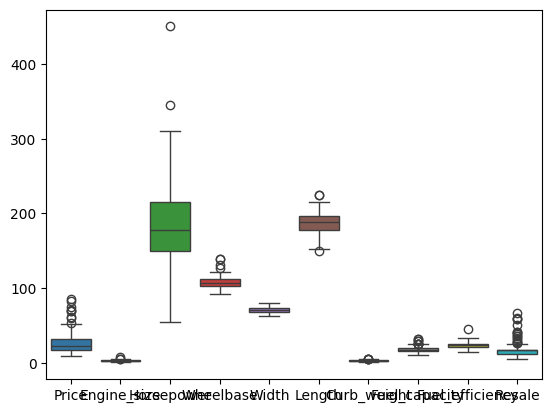

In [5]:
import seaborn as sns
sns.boxplot(data=df)

# Treatment of Outlier -- Winsorizing Technique

In [6]:
for i in df:                  # i = column name
    if df[i].dtypes in ("float64","int64"): # df[i] = every column will select float & int column only
        q1 = df[i].quantile(0.25)  # for 1 column compute q1
        q3 = df[i].quantile(0.75)  # for 1 column compute q3
        iqr = q3-q1  # for 1 column compute IQR
        ul = q3 + 1.5*iqr # for 1 column compute UPPER LIMIT
        ll = q1 - 1.5*iqr # for 1 column compute LOWER LIMIT
        # df[i].clip(upper=ul,lower=ll,inplace=True)
        df[i] = df[i].clip(upper=ul, lower=ll)

        df.clip({i: (ll, ul)}, axis=1, inplace=True)


ValueError: Unable to coerce to Series, length must be 10: given 1

<Axes: >

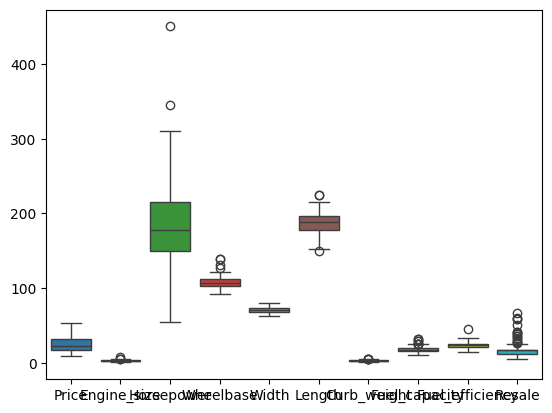

In [8]:
import seaborn as sns
sns.boxplot(data=df)

# Data Partition

In [9]:
# Putting feature variable to X
X = df.drop('Price', axis= 1)

# Putting response variable to y
y = df[['Price']]

#random_state is the seed used by the random number generator. It can be any integer.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X, y, train_size=0.7 ,random_state=134)

ModuleNotFoundError: No module named 'sklearn'

In [10]:
train = pd.concat([y_train, X_train], axis=1)
train.head()

NameError: name 'y_train' is not defined

In [11]:
Correlation=train.corr()
Correlation.style.applymap(lambda x: 'background-color : yellow' if x > 0.7 else '')

NameError: name 'train' is not defined

Correlation
* Resale & Horsepower have high impact on Price of Car


# VIF

In [12]:
X1.shape

NameError: name 'X1' is not defined

In [13]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X1=df.drop(['Price'],axis=1)
series_before = pd.Series([variance_inflation_factor(X1.values, i)
                           for i in range(X1.shape[1])],  # i=0,1,2,...8
                          index=X1.columns)  # column name
series_before

ModuleNotFoundError: No module named 'statsmodels'

* Multi- colinearity is Present in Dataset

# Model Builiding

*  H0 :- There is no Linear relationship between Price and all independent Variable
                         Vs

*  H1 :- There is Linear relationship between Price and all independent Variable

* Alpha = 0.05 (5%)

#### Method 2 -- Variable selection Method
1. Forward Selection Method
2. Backward Selection Method

In [14]:
# importing the models
from sklearn.linear_model import LinearRegression

ModuleNotFoundError: No module named 'sklearn'

In [15]:
from sklearn.feature_selection import SequentialFeatureSelector as sfs
lreg = LinearRegression()
Model3 = sfs(lreg, n_features_to_select = 5, direction='backward', scoring='r2',cv=5)
Model3.fit(X_train,y_train)

ModuleNotFoundError: No module named 'sklearn'

In [16]:
Model3.feature_names_in_

NameError: name 'Model3' is not defined

In [17]:
Model3.get_feature_names_out()

NameError: name 'Model3' is not defined

#### Method 2 -- sklearn

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
X_train = X_train.loc[:,['Horsepower','Wheelbase', 'Length', 'Curb_weight', 'Resale']]
X_train

,Horsepower,Wheelbase,Length,Curb_weight,Resale
131,137.00,106.5,190.4,3.075,18.061000
88,200.00,114.7,212.0,3.958,14.875000
8,193.00,107.3,176.0,3.197,26.410625
0,140.00,101.2,172.4,2.639,16.360000
122,185.00,120.0,201.3,3.942,18.061000
...,...,...,...,...,...
15,275.00,112.2,201.0,3.990,26.410625
114,132.00,108.0,186.3,2.942,9.800000
119,200.00,101.1,193.4,3.492,17.805000
120,195.00,110.5,196.5,3.396,14.010000


In [30]:
train = pd.concat([y_train, X_train], axis=1)
train.head()

,Price,Horsepower,Wheelbase,Length,Curb_weight,Resale
131,18.835,137.0,106.5,190.4,3.075,18.061000
88,22.605,200.0,114.7,212.0,3.958,14.875000
8,33.400,193.0,107.3,176.0,3.197,26.410625
0,21.500,140.0,101.2,172.4,2.639,16.360000
122,25.635,185.0,120.0,201.3,3.942,18.061000


In [31]:
Model3 = LinearRegression()
Model3.fit(X_train,y_train)

LinearRegression()

In [32]:
np.round(Model3.intercept_,3)

array([10.482])

In [35]:
np.round(Model3.coef_,3)

array([[ 0.15 ,  0.193, -0.261,  1.982,  0.593]])

In [36]:
Model3.feature_names_in_

array(['Horsepower', 'Wheelbase', 'Length', 'Curb_weight', 'Resale'],
      dtype=object)

# Model

* y = 10.48 + 0.149 * Horsepower + 0.192 * Wheelbase -0.260 * Length + 1.982 * Curb_weight +0.593*Resale

# Prediction on Train

In [37]:
import numpy as np
train['fitted_value'] = np.round(Model3.predict(X_train),2)
train['Residual'] = np.round(train.Price - train.fitted_value,2)
train

,Price,Horsepower,Wheelbase,Length,Curb_weight,Resale,fitted_value,Residual
131,18.8350,137.00,106.5,190.4,3.075,18.061000,18.65,0.19
88,22.6050,200.00,114.7,212.0,3.958,14.875000,23.89,-1.28
8,33.4000,193.00,107.3,176.0,3.197,26.410625,36.14,-2.74
0,21.5000,140.00,101.2,172.4,2.639,16.360000,20.90,0.60
122,25.6350,185.00,120.0,201.3,3.942,18.061000,27.31,-1.67
...,...,...,...,...,...,...,...,...
15,44.4750,275.00,112.2,201.0,3.990,26.410625,44.42,0.05
114,16.0800,132.00,108.0,186.3,2.942,9.800000,14.09,1.99
119,25.3100,200.00,101.1,193.4,3.492,17.805000,26.94,-1.63
120,21.6650,195.00,110.5,196.5,3.396,14.010000,24.75,-3.09


In [38]:
from sklearn.metrics import r2_score
r2 = r2_score(train.Price,train.fitted_value)
print('R2 score for model Performance on Train : ', np.round(r2,2)*100)

R2 score for model Performance on Train :  89.0


# Assumption of Linear Regression

<Axes: title={'center': 'Price vs Resale'}, xlabel='Resale', ylabel='Price'>

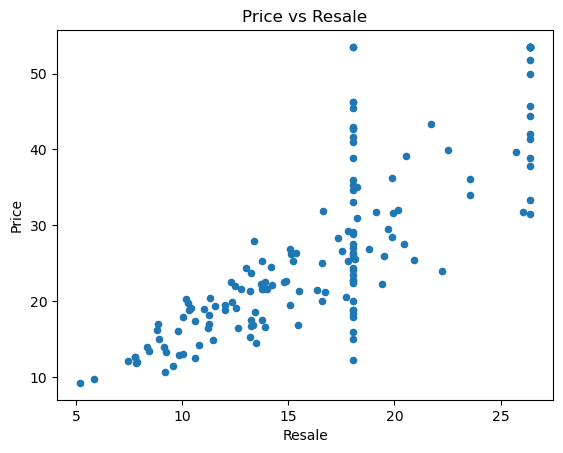

In [39]:
df.plot.scatter(x='Resale', y='Price', title='Price vs Resale')

# Homoscedasicity

<Axes: xlabel='fitted_value', ylabel='Residual'>

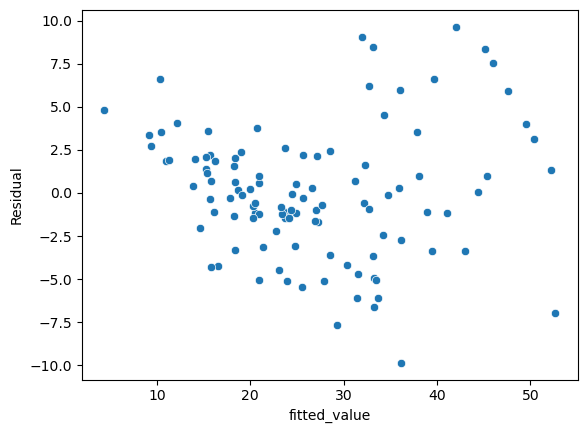

In [40]:
sns.scatterplot(x='fitted_value', y='Residual',data=train)

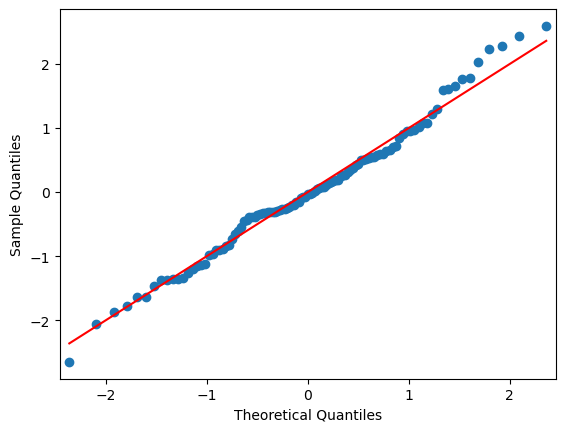

In [41]:
import statsmodels.api as sm
from matplotlib import pyplot as plt

fig = sm.qqplot(train['Residual'], fit=True, line='s') # s indicate standardized line
plt.show()

<Axes: ylabel='Frequency'>

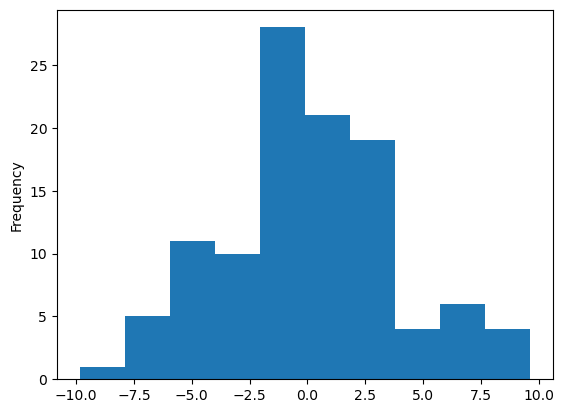

In [42]:
train['Residual'].plot.hist()

# Prediction on Test

In [43]:
X_test = X_test.loc[:,['Horsepower','Wheelbase', 'Length', 'Curb_weight', 'Resale']]
X_test

,Horsepower,Wheelbase,Length,Curb_weight,Resale
99,215.0,111.0,180.60,4.38700,18.061000
25,120.0,97.1,174.30,2.39800,9.125000
12,205.0,113.8,206.80,3.77800,20.190000
146,150.0,106.4,184.10,3.04300,16.725000
61,92.0,96.1,166.70,2.24000,5.860000
76,215.0,117.7,215.30,4.12100,21.725000
113,132.0,105.0,174.40,2.55900,7.750000
154,236.0,104.9,185.70,3.60100,18.061000
2,225.0,106.9,192.00,3.47000,18.225000
140,194.0,114.2,193.50,3.75900,18.061000


In [44]:
test = pd.concat([y_test, X_test], axis=1)
test.head()

,Price,Horsepower,Wheelbase,Length,Curb_weight,Resale
99,35.300,215.0,111.0,180.6,4.387,18.061
25,13.960,120.0,97.1,174.3,2.398,9.125
12,31.965,205.0,113.8,206.8,3.778,20.190
146,21.200,150.0,106.4,184.1,3.043,16.725
61,9.699,92.0,96.1,166.7,2.240,5.860


In [45]:
import numpy as np
test['Prediction'] = np.round(Model3.predict(X_test),2)
test['Residual'] = np.round(test.Price - test.Prediction,2)
test.head()

,Price,Horsepower,Wheelbase,Length,Curb_weight,Resale,Prediction,Residual
99,35.300,215.0,111.0,180.6,4.387,18.061,36.36,-1.06
25,13.960,120.0,97.1,174.3,2.398,9.125,11.85,2.11
12,31.965,205.0,113.8,206.8,3.778,20.190,28.62,3.34
146,21.200,150.0,106.4,184.1,3.043,16.725,21.36,-0.16
61,9.699,92.0,96.1,166.7,2.240,5.860,7.19,2.51


# Comparision

In [46]:
from sklearn.metrics import r2_score
r2 = r2_score(train.Price,train.fitted_value)
print('R2 score for model Performance on Train : ', np.round(r2,2)*100)

R2 score for model Performance on Train :  89.0


In [47]:
from sklearn.metrics import r2_score
r2 = r2_score(test.Price,test.Prediction)
print('R2 score for model Performance on Test : ', np.round(r2,2)*100)

R2 score for model Performance on Test :  81.0


# Loss Function -- RMSE

In [48]:
from sklearn.metrics import mean_squared_error
# calculate the mean squared error
model_mse = mean_squared_error(train['Price'],train['fitted_value'])
# calulcate the root mean squared error
model_rmse = np.sqrt(model_mse)

print("RMSE of Train Data : ",np.round(model_rmse,2)) #21

RMSE of Train Data :  3.72


In [49]:
from sklearn.metrics import mean_squared_error
# calculate the mean squared error
model_mse = mean_squared_error(test['Price'],test['Prediction'])
# calulcate the root mean squared error
model_rmse = np.sqrt(model_mse)

print("RMSE of Test Data : ",np.round(model_rmse,2)) #21

RMSE of Test Data :  5.4
